# G09 Ví dụ: Mô phỏng khoảng tin cậy 95%

## Mục đích

Với ví dụ này, chúng ta sẽ ôn lại một công cụ biểu đồ quan trọng trong thống kê: error bar.


## Bài toán

Khi tiến hành nghiên cứu, chúng ta thường chọn một mẫu có cỡ mẫu $n$ từ quần thể. Từ mẫu này, chúng ta đo lường một biến nào đó (ví dụ, huyết áp tâm thu) và tính ra được trung bình của mẫu $\bar{X}$. Giá trị trung bình mẫu này hầu như không bao giờ trùng với trung bình thật sự của quần thể $\mu$, do đó, chúng ta cần đo lường mức độ "cách xa trung bình quần thể", còn được gọi là "độ không chắc chắn" hay uncertainty. Một trong các cách đo uncertainty là khoảng tin cậy (confidence interval, CI) do nhà toán học Neyman đề xuất.

Ý nghĩa của khoảng tin cậy $a%$ là: nếu như chúng ta lặp lại vô số lần nghiên cứu với cùng phương pháp như trên, chúng ta sẽ có $a%$ số khoảng tin cậy tính toán theo cùng một cách **chứa trung bình quần thể $\mu$** trong đó. Phát biểu này khá khó tưởng tượng, nhưng sẽ dễ hiểu hơn nếu chúng ta minh họa nó bằng hình ảnh.


## Giải pháp

Đầu tiên, chúng ta sẽ xây dựng số liệu cho toàn bộ quần thể.

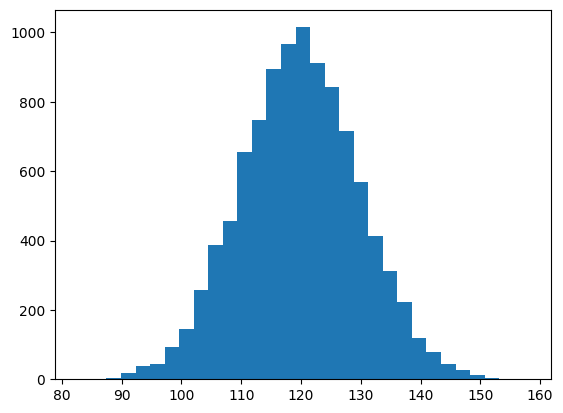

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def build_pop_data(n_pop: int, seed=0):
    np.random.seed(seed)
    return np.random.normal(120, 10, n_pop)

n_pop = 10000
pop_data = build_pop_data(n_pop)

_ = plt.hist(pop_data, bins=31)
plt.show()

Tiếp theo, chúng ta sẽ viết một hàm để chọn mẫu ngẫu nhiên từ quần thể này. Tuy nhiên, cái chúng ta cần không phải là toàn bộ dữ liệu của mẫu, mà chỉ cần trung bình và độ lệch chuẩn của mẫu (để tính khoảng tin cậy 95%).

In [2]:
def get_random_sample(data, n_sample: int):
    sample_data = np.random.choice(data, n_sample, replace=False)
    return np.mean(sample_data), np.std(sample_data)

n_sample = 50
get_random_sample(pop_data, n_sample)

(121.7063042702087, 9.940827687384717)

Chúng ta sẽ lặp lại việc chọn mẫu này trong một số lần và như vậy sẽ có một quần thể trung bình mẫu.

In [3]:
n_times = 10
sample_stats = list(map(lambda _: get_random_sample(pop_data, n_times), range(n_times)))
sample_stats

[(121.40410567374074, 8.746547792419449),
 (117.35515635595814, 7.476486419834467),
 (118.99778644487421, 11.270939424211418),
 (122.41447411719669, 8.343422917126535),
 (121.83290719031122, 7.926618707482988),
 (121.7182237317347, 6.055923419088888),
 (116.33329717868014, 7.367208688292685),
 (115.43739887625834, 7.409854452202138),
 (119.05580292122647, 10.478204927310479),
 (119.6903933046863, 7.979903373797299)]

Chúng ta sẽ lưu kết quả này vào một data frame để dễ thao tác hơn về sau.

In [4]:
d = pd.DataFrame(sample_stats, columns=["mean", "sd"])
d

,mean,sd
0,121.404106,8.746548
1,117.355156,7.476486
2,118.997786,11.270939
3,122.414474,8.343423
4,121.832907,7.926619
5,121.718224,6.055923
6,116.333297,7.367209
7,115.437399,7.409854
8,119.055803,10.478205
9,119.690393,7.979903


Chúng ta tiếp tục tính khoảng tin cậy 95%. Công thức của 95%CI cho trung bình là:

$$
\bar{x} \pm 1.96 \times \frac{s_x}{\sqrt{n}}
$$

Để vẽ error bar cho khoảng tin cậy 95% thì chúng ta không cần tính giới hạn trên và dưới của nó mà chỉ cần tính "error" (cụm phía sau dấu $\pm$).

In [5]:
d["error"] = 1.96 * d["sd"] / np.sqrt(n_sample)
d

,mean,sd,error
0,121.404106,8.746548,2.424419
1,117.355156,7.476486,2.072376
2,118.997786,11.270939,3.124145
3,122.414474,8.343423,2.312679
4,121.832907,7.926619,2.197147
5,121.718224,6.055923,1.678616
6,116.333297,7.367209,2.042086
7,115.437399,7.409854,2.053907
8,119.055803,10.478205,2.904410
9,119.690393,7.979903,2.211916


Giờ chúng ta đã có data để vẽ error bar.

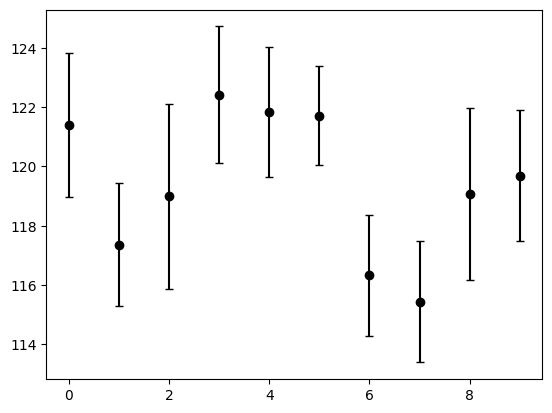

In [6]:
plt.errorbar(d.index, "mean", "error", data=d, fmt="ok", capsize=3)
plt.show()

Chúng ta sẽ điều chỉnh định dạng của biểu đồ này sau. Trước hết hãy thêm đường thẳng chỉ trung bình thật sự của quần thể.

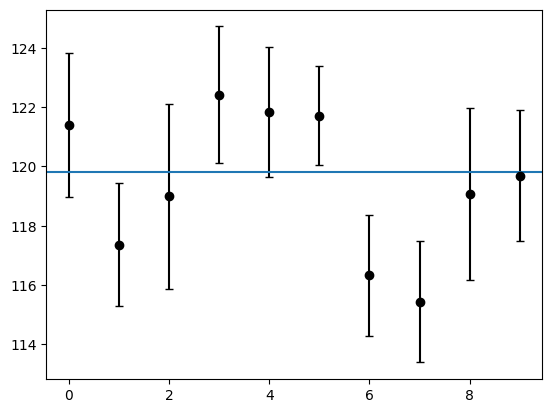

In [7]:
pop_mean = np.mean(pop_data)

plt.errorbar(d.index, "mean", "error", data=d, fmt="ok", capsize=3)
plt.axhline(pop_mean)
plt.show()

Chúng ta cũng muốn những khoảng tin cậy nào không chứa giá trị thật của quần thể sẽ hiện màu đỏ.

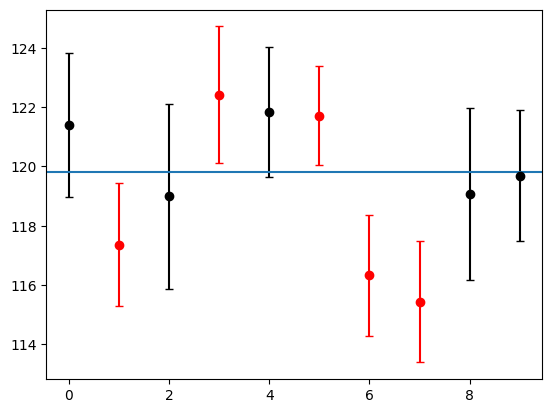

In [8]:
d["cil"] = d["mean"] - d["error"]
d["ciu"] = d["mean"] + d["error"]
d["has_pop_mean"] = d["cil"].le(pop_mean) & d["ciu"].ge(pop_mean)

colors = {True: "k", False: "r"}
d_grpby = d.groupby("has_pop_mean")
for group in d_grpby.groups:
    data = d_grpby.get_group(group)
    plt.errorbar(data.index, "mean", "error", data=data,
                 color=colors[group], fmt="o", capsize=3)
plt.axhline(pop_mean)
plt.show()

Mình sẽ gom các đoạn code trên vào thành một file code duy nhất dưới đây và bổ sung các điều chỉnh về định dạng của biểu đồ. Bạn thử đọc xem có hiểu hết ý nghĩa của các dòng lệnh không nhé, coi như một lần kiểm tra lại kiến thức Python của bản thân.

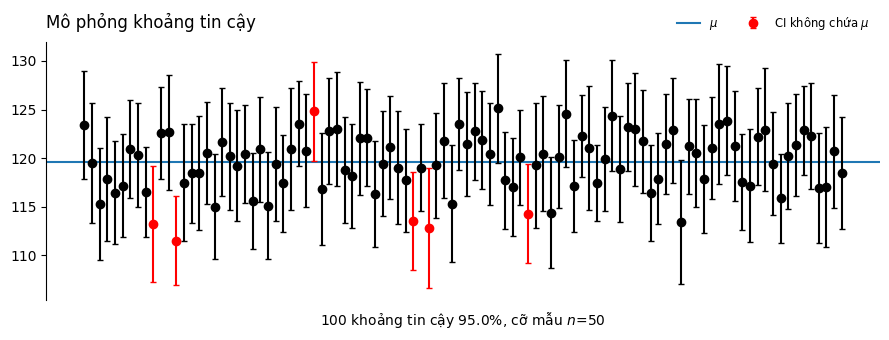

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats


def build_pop_data(n_pop: int, seed=0):
    np.random.seed(seed)
    return np.random.normal(120, 20, n_pop)

def get_random_sample(data, n_sample: int):
    sample_data = np.random.choice(data, n_sample, replace=False)
    return np.mean(sample_data), np.std(sample_data)

def do_sampling(data, n_sample: int, n_times: int, ci_level=.95):
    d = pd.DataFrame(
        map(lambda _: get_random_sample(pop_data, n_sample), range(n_times)),
        columns=["mean", "sd"]
    )

    pop_mean = np.mean(data)

    z = stats.norm.ppf(.5 + ci_level / 2)
    d["error"] = z * d["sd"] / np.sqrt(n_sample)
    d["cil"] = d["mean"] - d["error"]
    d["ciu"] = d["mean"] + d["error"]
    d["has_pop_mean"] = d["cil"].le(pop_mean) & d["ciu"].ge(pop_mean)

    return d, pop_mean

def plot_ci(d: pd.DataFrame, pop_mean, colors, n_sample, ci_level):
    fig, ax = plt.subplots(figsize=(9, 3.5), tight_layout=True)
    labels = {True: None, False: "CI không chứa $\mu$"}
    
    ax.axhline(pop_mean, label="$\mu$")

    d_grpby = d.groupby("has_pop_mean")
    for group in d_grpby.groups:
        data = d_grpby.get_group(group)
        ax.errorbar(data.index, "mean", "error", data=data,
                    color=colors[group], fmt="o", capsize=2,
                    label=labels[group])
    
    ax.spines[["top", "right", "bottom"]].set_visible(False)
    ax.set_xlim(-5, n_times + 4)
    ax.set_xticks([])

    ax.legend(frameon=False, fontsize="small", ncols=2,
              loc="lower right", bbox_to_anchor=[1, 1])
    
    ax.set_title("Mô phỏng khoảng tin cậy", loc="left", pad=10)
    ax.set_xlabel(f"{d.shape[0]} khoảng tin cậy {ci_level:.1%}, cỡ mẫu $n$={n_sample}")

    plt.show()


# SETTINGS
n_pop, n_sample, n_times = 10000, 50, 100
ci_level = .95
colors = {True: "k", False: "r"}

# SAMPLE AND PLOT
pop_data = build_pop_data(n_pop)
d, pop_mean = do_sampling(pop_data, n_sample, n_times, ci_level)
plot_ci(d, pop_mean, colors, n_sample, ci_level)

---

[Bài trước](./08_text.ipynb) - [Danh sách bài](../README.md) - [Bài sau](./10_pvalue.ipynb)